In [152]:
import pandas as pd

In [257]:
data=pd.read_csv('F:/Kaggle_version2/addtracking fraud detection/mnt/ssd/kaggle-talkingdata2/competition_files/train.csv',nrows=100000)

In [258]:
data.count()

ip                 100000
app                100000
device             100000
os                 100000
channel            100000
click_time         100000
attributed_time       169
is_attributed      100000
dtype: int64

In [155]:
data['day']=pd.DatetimeIndex(data['click_time']).day

In [156]:
data['month']=pd.DatetimeIndex(data['click_time']).month
data['year']=pd.DatetimeIndex(data['click_time']).year
data['hour']=pd.DatetimeIndex(data['click_time']).hour
data['minute']=pd.DatetimeIndex(data['click_time']).minute
data['second']=pd.DatetimeIndex(data['click_time']).second

In [157]:
data=data.drop(['click_time'],axis=1)

In [158]:
data['attributed_time'].fillna(0,inplace=True)
data.columns
data.head()

,ip,app,device,os,channel,attributed_time,is_attributed,day,month,year,hour,minute,second
0,83230,3,1,13,379,0,0,6,11,2017,14,32,21
1,17357,3,1,19,379,0,0,6,11,2017,14,33,34
2,35810,3,1,13,379,0,0,6,11,2017,14,34,12
3,45745,14,1,13,478,0,0,6,11,2017,14,34,52
4,161007,3,1,13,379,0,0,6,11,2017,14,35,8


In [253]:
print (data.columns.values)
print (data.corr().shape)
data['attributed_time'].unique()

['ip' 'app' 'device' 'os' 'channel' 'attributed_time' 'is_attributed'
 'minute' 'second']
(8, 8)


array([0, '2017-11-07 08:17:19', '2017-11-07 10:05:22',
       '2017-11-06 23:40:50', '2017-11-07 00:55:29',
       '2017-11-06 23:04:54', '2017-11-07 00:21:50',
       '2017-11-06 16:01:18', '2017-11-06 16:03:51',
       '2017-11-06 23:37:17', '2017-11-07 04:18:51',
       '2017-11-06 16:01:22', '2017-11-06 16:01:27',
       '2017-11-06 16:02:23', '2017-11-07 11:55:44',
       '2017-11-07 03:28:19', '2017-11-06 16:41:13',
       '2017-11-06 16:02:59', '2017-11-06 16:02:02',
       '2017-11-07 04:33:48', '2017-11-07 11:54:34',
       '2017-11-06 17:53:42', '2017-11-06 16:47:49',
       '2017-11-07 11:40:55', '2017-11-06 16:05:09',
       '2017-11-06 16:01:31', '2017-11-06 23:23:58',
       '2017-11-06 16:09:04', '2017-11-06 16:01:43',
       '2017-11-06 16:03:03', '2017-11-06 16:00:47',
       '2017-11-06 16:01:05', '2017-11-06 16:05:15',
       '2017-11-06 16:07:46', '2017-11-07 15:53:02',
       '2017-11-07 04:23:14'], dtype=object)

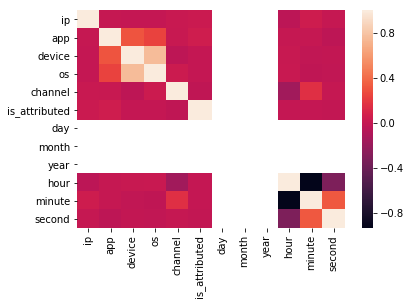

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr())
plt.show()

as seen above day month and year are highly +ve correlated with all features and hour is -ve correlated with minute .we need to drop correlated data 

In [160]:
#removing above column from dataframe
data=data.drop(['day','month','year','hour'],axis=1)



In [161]:
a=data.groupby(['channel'])['is_attributed'].agg('sum')
a.unique()

array([ 0,  5,  3,  1,  2, 13], dtype=int64)

In [225]:
b=a.reset_index().sort_values(['is_attributed'],ascending=False)

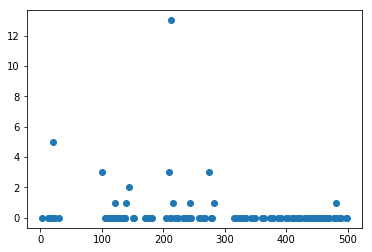

In [246]:
import matplotlib.pyplot as plt
plt.scatter(b['channel'],b['is_attributed'])
plt.show()
